# Anuj.K 
# CS20B1100
Problem statement:
1. Swap phase of the dog image and magnitude of the Lena image and display the output.
2. Swap phase of the Lena image and magnitude of the dog image and display the output
Solve 1 & 2 using built-in function (4 marks) and user defined function (6 marks).
Note:
a. Write a function to implement FFT for 1D signal.
b. Implement DFT function for an image using the “FFT for 1D” signal( derived in a)
c. Consider the images of Lena and dog images attached. Find phase and magnitude of
the dog and Lena images using the DFT function (in b).

In [1]:
import numpy as np 
import cv2 

## Using inbuilt Functions

In [2]:
dog_image = cv2.imread('dog.jpg', 0)  
lena_image = cv2.imread('lena.png', 0) 

# Compute the Fourier transforms of the images
dog_fft = np.fft.fft2(dog_image)
lena_fft = np.fft.fft2(lena_image)

# Swap the phase of the dog image with the magnitude of the Lena image
dog_mag = np.abs(dog_fft)
lena_phase = np.exp(1j * np.angle(lena_fft))
dog_new_fft = dog_mag * lena_phase

# Compute the inverse Fourier transform to obtain the swapped image
dog_new_image = np.fft.ifft2(dog_new_fft)

# Convert the image to the appropriate data type and scale the values to the range [0, 255]
dog_new_image = np.uint8(np.abs(dog_new_image))
dog_new_image = cv2.normalize(dog_new_image, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('Swapped Image', dog_new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
# Swap the phase of the Lena image with the magnitude of the dog image
lena_mag = np.abs(lena_fft)
dog_phase = np.exp(1j * np.angle(dog_fft))
lena_new_fft = lena_mag * dog_phase

# Compute the inverse Fourier transform to obtain the swapped image
lena_new_image = np.fft.ifft2(lena_new_fft)

# Convert the image to the appropriate data type and scale the values to the range [0, 255]
lena_new_image = np.uint8(np.abs(lena_new_image))
lena_new_image = cv2.normalize(lena_new_image, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('Swapped Image', lena_new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Using user-defined functions 

In [ ]:
# compute the 2D DFT of an image
def dft2d(image):
    M, N = image.shape
    u, v = np.meshgrid(np.arange(N), np.arange(M))
    exp = np.exp(-2j * np.pi * (u.reshape(-1, 1, 1) * np.arange(N) /
                 N + v.reshape(-1, 1, 1) * np.arange(M)[:, np.newaxis] / M))
    return np.sum(image.reshape(-1, 1, 1) * exp, axis=0)

# compute the 2D IDFT of an image
def idft2d(image):
    M, N = image.shape
    u, v = np.meshgrid(np.arange(N), np.arange(M))
    exp = np.exp(2j * np.pi * (u.reshape(-1, 1, 1) * np.arange(N) /
                 N + v.reshape(-1, 1, 1) * np.arange(M)[:, np.newaxis] / M))
    return np.real(np.sum(image.reshape(-1, 1, 1) * exp, axis=0) / (M * N))


# Compute the Fourier transforms of the images
dog_fft = dft2d(dog_image)
lena_fft = dft2d(lena_image)

# Swap the phase of the Lena image with the magnitude of the dog image
lena_mag = np.abs(lena_fft)
dog_phase = np.exp(1j * np.angle(dog_fft))
lena_new_fft = lena_mag * dog_phase

# Compute the inverse Fourier transform to obtain the swapped image
lena_new_image = idft2d(lena_new_fft)

# Convert the image to the appropriate data type and scale the values to the range [0, 255]
lena_new_image = np.uint8(np.abs(lena_new_image))
lena_new_image = cv2.normalize(lena_new_image, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('Swapped Image', lena_new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Swap the phase of the dog image with the magnitude of the Lena image
dog_mag = np.abs(dog_fft)
lena_phase = np.exp(1j * np.angle(lena_fft))
dog_new_fft = dog_mag * lena_phase

# Compute the inverse Fourier transform to obtain the swapped image
dog_new_image = idft2d(dog_new_fft)

# Convert the image to the appropriate data type and scale the values to the range [0, 255]
dog_new_image = np.uint8(np.abs(dog_new_image))
dog_new_image = cv2.normalize(dog_new_image, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('Swapped Image', dog_new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


(100, 100)
(100, 100)


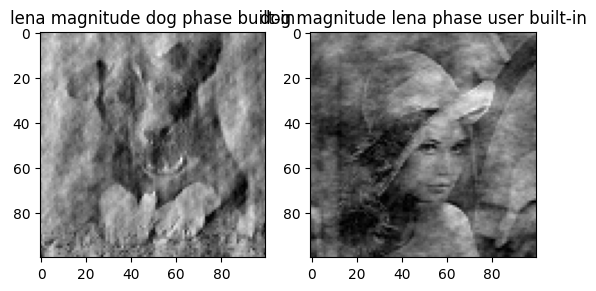

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

dog_image = cv2.imread("dog.jpg", 0)
lena_image = cv2.imread("Lena.png", 0)

dog_dft = np.fft.fft2(dog_image)
lena_dft = np.fft.fft2(lena_image)

dog_phase = np.angle(dog_dft)
dog_mag = np.abs(dog_dft)
lena_phase = np.angle(lena_dft)
lena_mag = np.abs(lena_dft)


new_dog_fft = lena_mag * np.exp(1j * dog_phase)
new_lena_fft = dog_mag * np.exp(1j * lena_phase)

lena_mag_dog_phase = np.abs(np.fft.ifft2(new_dog_fft))
dog_mag_lena_phase = np.abs(np.fft.ifft2(new_lena_fft))

plt.subplot(1, 2, 1)
plt.imshow(lena_mag_dog_phase, cmap='gray')
plt.title("lena magnitude dog phase built-in")
plt.subplot(1, 2, 2)
plt.imshow(dog_mag_lena_phase, cmap='gray')
plt.title("dog magnitude lena phase user built-in")
plt.show()
